# Exam Project

Import and set magics:

In [226]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
from ExchangeEconomyModel import ExchangeEconomyModelClass



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Problem 1

### Question 1.a

## Problem 2

### Question 2.1

__Summary of Findings:__

The left panel shows the demand for good 1 for A and B as a function of the price of good 1. Consumer A’s demand for good 1 is increasing in $(p_1)$ due to a positive income effect from her large endowment of good 1, while consumer B’s demand is decreasing as good 1 becomes relatively more expensive.

The right panel show the excess-demand function $(\epsilon_1(p_1))$. The curve crosses zero at three distinct price levels, implying three  equilibria. Market occurs at approximately $(p_1 \approx 0.42)$, $(p_1 \approx 0.99)$, and $(p_1 \approx 2.39)$. 


Approximate equilibrium prices for good 1:
Low equilibrium:      p1 ≈ 0.41792929
Middle equilibrium:   p1 ≈ 0.99368687
High equilibrium:     p1 ≈ 2.38510101


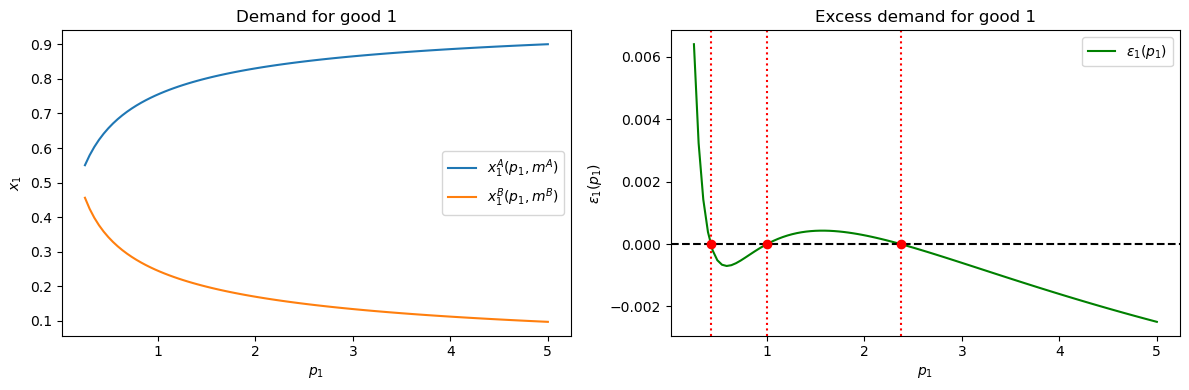

In [227]:
# 1) Model
Exchange = ExchangeEconomyModelClass()

# 2) Price grid
p1_grid = np.linspace(0.25, 5, 100)

# 3) compute demands + excess demand
x1A = np.empty_like(p1_grid)
x1B = np.empty_like(p1_grid)
eps1 = np.empty_like(p1_grid)

for i, p1 in enumerate(p1_grid):
    # Demands
    x1A[i], _ = Exchange.demand_A(p1)
    x1B[i], _ = Exchange.demand_B(p1)

    # Excess demand for good 1: eps1(p1) = x1A + x1B - 1
    eps1[i] = x1A[i] + x1B[i] - 1


# # 4) Compute approximate equilibrium prices
# # Find sign changes (approximate roots) since this is where excess demand crosses zero
sign_changes = np.where(np.sign(eps1[:-1]) != np.sign(eps1[1:]))[0]

# # Approximate equilibrium prices from sign changes
p1_eq_scan = 0.5 * (p1_grid[sign_changes] + p1_grid[sign_changes + 1])
p1_eq_scan = np.sort(p1_eq_scan)

p_low_scan, p_mid_scan, p_high_scan = p1_eq_scan


# Print results clearly
print("Approximate equilibrium prices for good 1:")
print(f"Low equilibrium:      p1 ≈ {p_low_scan:.8f}")
print(f"Middle equilibrium:   p1 ≈ {p_mid_scan:.8f}")
print(f"High equilibrium:     p1 ≈ {p_high_scan:.8f}")


# 5) Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# 5.1 Demands plot
ax[0].plot(p1_grid, x1A, label=r"$x_1^A(p_1,m^A)$")
ax[0].plot(p1_grid, x1B, label=r"$x_1^B(p_1,m^B)$")
ax[0].set_xlabel(r"$p_1$")
ax[0].set_ylabel(r"$x_1$")
ax[0].set_title("Demand for good 1")
ax[0].legend()

# 5.2 Excess demand plot
ax[1].plot(p1_grid, eps1, color="green", label=r"$\epsilon_1(p_1)$")
ax[1].axhline(0, linestyle="--", color="black")

for p in p1_eq:
    ax[1].plot(p, 0, 'ro')
    ax[1].axvline(p, color='red', ls=':')

ax[1].set_xlabel(r"$p_1$")
ax[1].set_ylabel(r"$\epsilon_1(p_1)$")
ax[1].set_title("Excess demand for good 1")
ax[1].legend()


plt.tight_layout()
plt.show()




### Question 2.2

__Summary of Findings:__

Starting from $(p_1^0 = 0.9)$, the tâtonnement algorithm converges to the low equilibrium $(p_1 \approx 0.42)$, while starting from $(p_1^0 = 1.1)$ it converges to the high equilibrium $(p_1 \approx 2.37)$. Hence, the choice of initial guess determines which equilibrium is selected.

Although $(p_1 \approx 1)$ is a Walrasian equilibrium, it is unstable under tâtonnement. Small deviations from this price cause the adjustment process to move away toward either the low or the high stable equilibrium.


Low tatonnement equilibrium: 0.42187627669863426
High tatonnement equilibrium: 2.3703561473576165


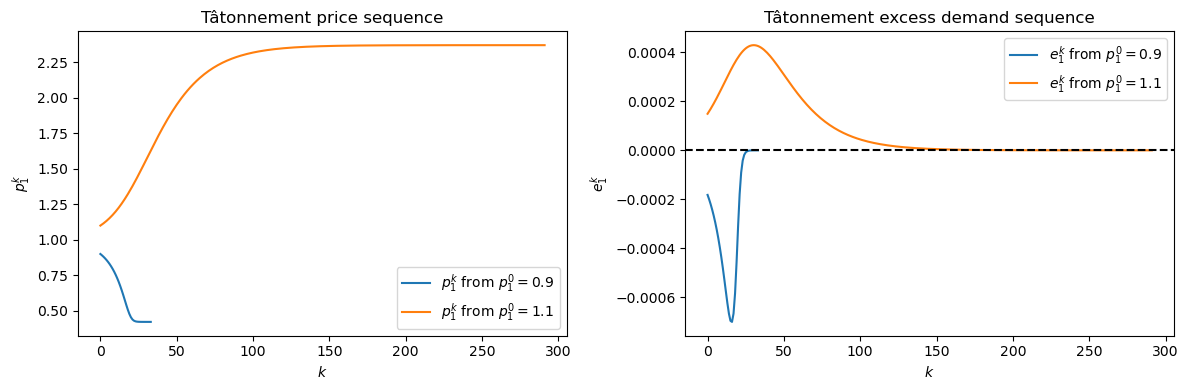

In [228]:
#1) Run tatonnement from two different starting points
p_seq_09, e_seq_09 = Exchange.tatonnement(0.9)
p_seq_11, e_seq_11 = Exchange.tatonnement(1.1)

# Tatonnement equilibrium prices
p1_eq_low_T = p_seq_09[-1]
p1_eq_high_T = p_seq_11[-1]

print("Low tatonnement equilibrium:", p1_eq_low_T)
print("High tatonnement equilibrium:", p1_eq_high_T)


#2) Plot results
fig, ax = plt.subplots(1, 2, figsize=(12,4))

# 2.1) Prices plot
ax[0].plot(p_seq_09, label=r"$p_1^k$ from $p_1^0=0.9$")
ax[0].plot(p_seq_11, label=r"$p_1^k$ from $p_1^0=1.1$")
ax[0].set_xlabel(r"$k$")
ax[0].set_ylabel(r"$p_1^k$")
ax[0].set_title("Tâtonnement price sequence")
ax[0].legend()

# 2.2)Excess demand plot
ax[1].plot(e_seq_09, label=r"$e_1^k$ from $p_1^0=0.9$")
ax[1].plot(e_seq_11, label=r"$e_1^k$ from $p_1^0=1.1$")
ax[1].axhline(0, linestyle="--", color="black")
ax[1].set_xlabel(r"$k$")
ax[1].set_ylabel(r"$e_1^k$")
ax[1].set_title("Tâtonnement excess demand sequence")
ax[1].legend()

plt.tight_layout()
plt.show()




### Question 2.3

__Summary of Findings:__

Applying the tâtonnement algorithm to a grid of initial prices $(p_1^0 \in \texttt{linspace}(0.25,5,50))$ leads to convergence only to the low and high equilibria. The middle equilibrium does not appear in the numerical results because it is unstable, and the grid does not contain exactly this price. As a result, any nearby initial guess causes the price to move toward one of the stable equilibria.

From an economic point of view, the middle price is still a Walrasian equilibrium. If the initial guess were exactly equal to this price, excess demand would be zero and the tâtonnement process would remain there. However, this case does not arise in the numerical implementation due to the discrete grid of initial prices.


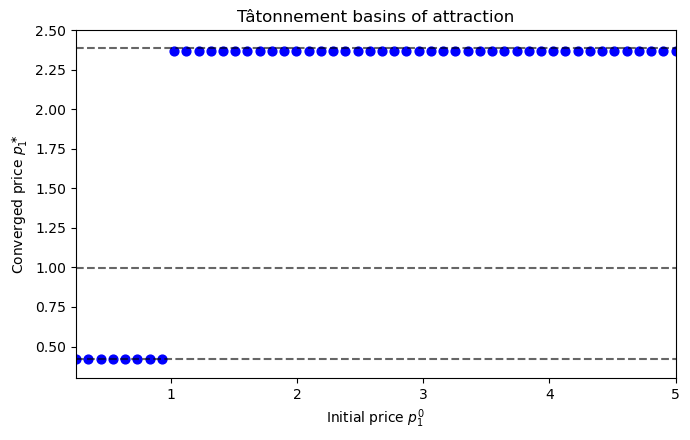

In [229]:
# 1) Many initial guesses
p0_grid = np.linspace(0.25, 5, 50)

pstar = np.empty_like(p0_grid)
converged = np.zeros_like(p0_grid, dtype=bool)

for i, p0 in enumerate(p0_grid):
    p_seq, e_seq = Exchange.tatonnement(p0)
    pstar[i] = p_seq[-1]
    converged[i] = (abs(e_seq[-1]) < Exchange.par.tol)  

# 2) Plot
plt.figure(figsize=(7,4.5))

plt.scatter(p0_grid, pstar, color="blue", s=40)

# Highlight converged points based on the 2.1
for p in [p_low_scan, p_mid_scan, p_high_scan]:
    plt.axhline(p, ls="--", color="black", alpha=0.6)


plt.xlabel(r"Initial price $p_1^0$")
plt.ylabel(r"Converged price $p_1^\ast$")
plt.title("Tâtonnement basins of attraction")

plt.xlim(p0_grid.min(), p0_grid.max())
plt.ylim(0.30, 2.50)

plt.tight_layout()
plt.show()



### Question 2.4

__Summary of Findings:__

The dampened Newton–Raphson algorithm converges to alll three  equilibrium prices,  $( p_1^* \approx 0.4219 )$, $( p_1^* = 1.0000 )$ and $( p_1^* \approx 2.3704 )$. Which equilibrium is reached depends on the initial price guess $( p_1^0 )$, indicating the presence of multiple basins of attraction. Thus, the method identifies all equilibria in the model, but convergence is sensitive to initial conditions.


NR equilibrium prices: [0.4219 1.     2.3704]


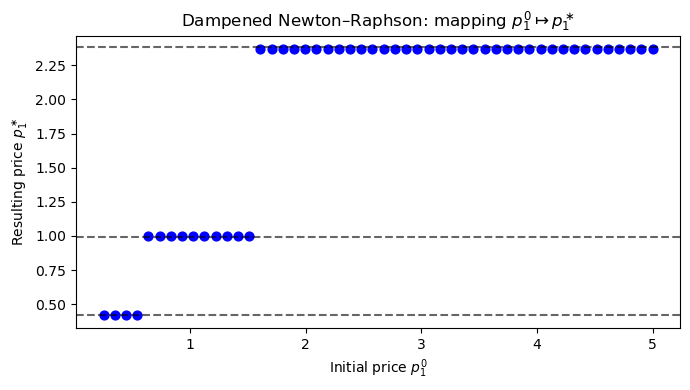

In [230]:
#1) Grid and plot
from matplotlib.pyplot import box


p0_grid = np.linspace(0.25, 5, 50)

pstar = np.empty_like(p0_grid)
converged = np.zeros_like(p0_grid, dtype=bool)

for i, p0 in enumerate(p0_grid):
    p_seq, e_seq = Exchange.newton_damped(p0)
    pstar[i] = p_seq[-1]
    converged[i] = (abs(e_seq[-1]) < Exchange.par.tol)

# 2) Equilibria
p1_eq_NR = np.sort(np.unique(np.round(pstar[converged], 4)))
print("NR equilibrium prices:", p1_eq_NR)

p_low_NR, p_mid_NR, p_high_NR = p1_eq_NR


#3) Plot
plt.figure(figsize=(7,4))

plt.scatter(p0_grid[converged], pstar[converged], color="blue", s=40) 

# Highlight converged points based on the 2.1
for p in [p_low_scan, p_mid_scan, p_high_scan]:
    plt.axhline(p, ls="--", color="black", alpha=0.6)


plt.xlabel(r"Initial price $p_1^0$")
plt.ylabel(r"Resulting price $p_1^\ast$")
plt.title("Dampened Newton–Raphson: mapping $p_1^0 \\mapsto p_1^\\ast$")
plt.tight_layout()





### Question 2.5

__Summary of Findings:__

The Edgeworth box illustrates competitive equilibria computed using both tâtonnement and Newton–Raphson methods. In both cases, the equilibria correspond to allocations where individual demands are mutually consistent and markets clear.

The tâtonnement approach identifies equilibria through gradual price adjustment and converges to a smaller set of stable equilibrium points. In contrast, the Newton–Raphson method uncovers multiple equilibria by exploiting local information and different initial price guesses, revealing a richer equilibrium structure.

Overall, both methods confirm the same underlying economic equilibria, but Newton–Raphson provides a more complete picture of equilibria, while tâtonnement highlights dynamically stable outcomes.


Tatonnement equilibria: [0.4219 2.3704]


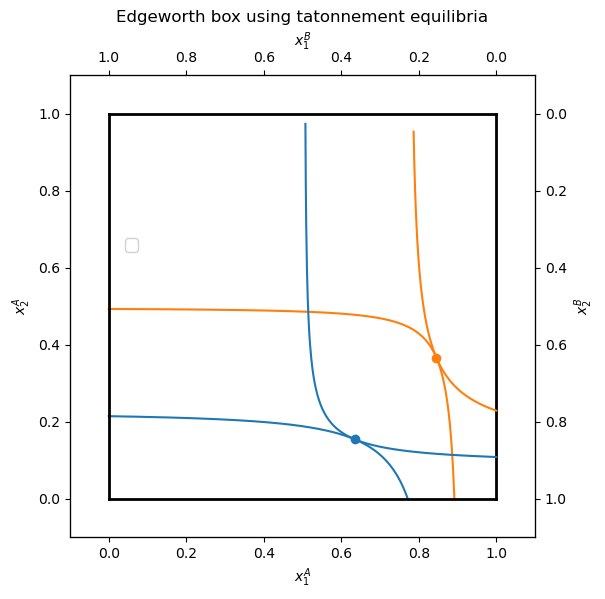

In [235]:
# find equilibria using tatonnement
p1_eq_tatonnement = []

for p0 in np.linspace(0.25, 5, 50):
    p_star = Exchange.solve_walras(p0, method='tatonnement')
    p1_eq_tatonnement.append(p_star)
p1_eq_tatonnement = np.sort(np.unique(np.round(p1_eq_tatonnement, 4)))
print("Tatonnement equilibria:", p1_eq_tatonnement)

fig, ax_A, ax_B = Exchange.create_edgeworthbox()

for p1 in p1_eq_tatonnement:
    x1A, x2A = Exchange.demand_A(p1)
    x1B, x2B = Exchange.demand_B(p1)

    ax_A.scatter(x1A, x2A)
    Exchange.indifference_curve_A(ax_A, x1A, x2A)
    Exchange.indifference_curve_B(ax_B, x1B, x2B)


Exchange.add_legend(ax_A, ax_B)
plt.title("Edgeworth box using tatonnement equilibria")
plt.show()

Newton–Raphso equilibria: [0.4219 1.     2.3704]


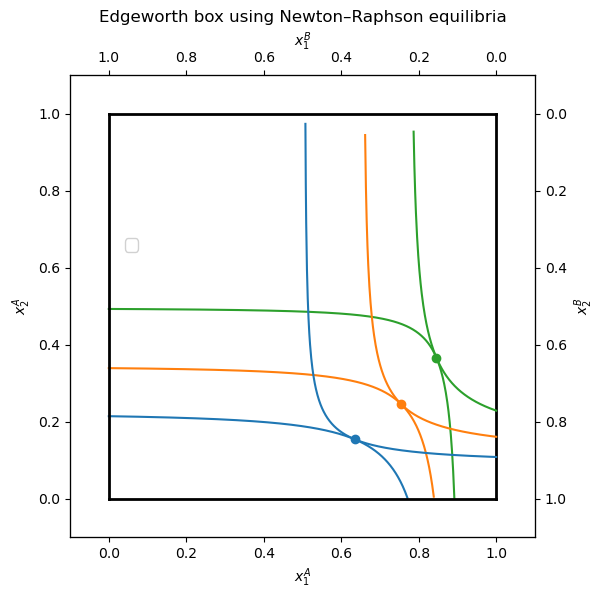

In [239]:
# find equilibria using Newton–Raphson
p1_eq_NR = []

for p0 in np.linspace(0.25, 5, 50):
    p_star = Exchange.solve_walras(p0, method='newton')
    p1_eq_NR.append(p_star)

p1_eq_NR = np.sort(np.unique(np.round(p1_eq_NR, 4)))
print("Newton–Raphso equilibria:", p1_eq_NR)

fig, ax_A, ax_B = Exchange.create_edgeworthbox()

for p1 in p1_eq_NR:
    x1A, x2A = Exchange.demand_A(p1)
    x1B, x2B = Exchange.demand_B(p1)

    ax_A.scatter(x1A, x2A)
    Exchange.indifference_curve_A(ax_A, x1A, x2A)
    Exchange.indifference_curve_B(ax_B, x1B, x2B)

Exchange.add_legend(ax_A, ax_B)


plt.title("Edgeworth box using Newton–Raphson equilibria")
plt.show()
